<a href="https://colab.research.google.com/github/Ruwai/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module3-reshape-data/LS_DS_123_Reshape_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 4.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [81]:
table1

treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1

"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [82]:
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [83]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable': 'trt',
    'value': 'result'
})

tidy.trt = tidy.trt.str.replace('treatment', '')

tidy

name trt  result
0    John Smith   a     NaN
1      Jane Doe   a    16.0
2  Mary Johnson   a     3.0
3    John Smith   b     2.0
4      Jane Doe   b    11.0
5  Mary Johnson   b     1.0

In [84]:
tidy.trt.replace('a', 0).replace('b', 1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [85]:
tidy.trt.map({'a': 0, 'b': 1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [86]:
(tidy.trt == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [87]:
tidy2 = table2.reset_index().melt(id_vars='index')
tidy2

index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0

In [88]:
tidy2 = tidy2.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})

tidy2.trt = tidy2.trt.str.replace('treatment', '')

tidy2

trt          name  result
0   a    John Smith     NaN
1   b    John Smith     2.0
2   a      Jane Doe    16.0
3   b      Jane Doe    11.0
4   a  Mary Johnson     3.0
5   b  Mary Johnson     1.0

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [89]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt              a     b
name                    
Jane Doe      16.0  11.0
John Smith     NaN   2.0
Mary Johnson   3.0   1.0

## Tidy --> Table 2

In [90]:
tidy2.pivot_table(index='trt', columns='name', values='result')

name  Jane Doe  John Smith  Mary Johnson
trt                                     
a         16.0         NaN           3.0
b         11.0         2.0           1.0

## Seaborn uses tidy data



> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

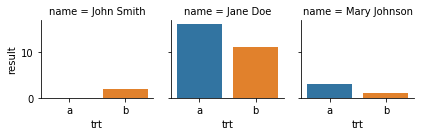

In [91]:
import seaborn as sns

sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

In [92]:
%matplotlib inline

flights = sns.load_dataset('flights')
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [93]:
flights.shape

(144, 3)

In [94]:
flights

year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951        May         172
29   1951       June         178
..    ...        ...         ...
114  1958       July         491
115  1958     August         505
116  1958  September         404
117  1958    October         359
118  1958   November         310
119  1958   December         337
120  1959    January         360
121  1959   February         342
122  1959      March         406
123  1959      April         396
124  1959        May         420
125  1959       June         472
126  1959       July         548
127  1959     August         559
128  1959  September         463
129  1959    October         407
130  1959   November         362
131  1959   December         405
132  1960    January         417
133  1960   February         391
134  1960      March         419
135  1960      April         461
136  1960        May         472
137  1960       June         535
138  1960       July         622
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]

In [0]:
flights_piv = flights.pivot_table(index='year', columns='month')

In [96]:
flights_piv

passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   
1954         204      188   235   227  234  264  302    293       259     229   
1955         242      233   267   269  270  315  364    347       312     274   
1956         284      277   317   313  318  374  413    405       355     306   
1957         315      301   356   348  355  422  465    467       404     347   
1958         340      318   362   348  363  435  491    505       404     359   
1959         360      342   406   396  420  472  548    559       463     407   
1960         417      391   419   461  472  535  622    606       508     461   

                         
month November December  
year                     
1949       104      118  
1950       114      140  
1951       146      166  
1952       172      194  
1953       180      201  
1954       203      229  
1955       237      278  
1956       271      306  
1957       305      336  
1958       310      337  
1959       362      405  
1960       390      432

In [0]:
# flights_table = pd.crosstab(flights['passengers'],
#                             flights['year'],
#                            normalize=True)

# flights_table

In [0]:
#jk we just visualize the pivot table

In [99]:
#melting?

flights['passengers'].max()

622

In [0]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']

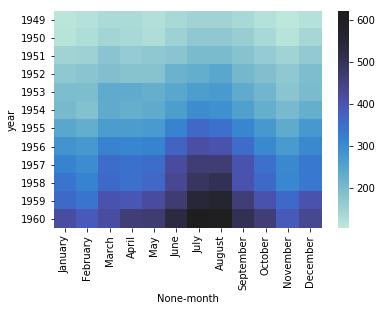

In [101]:
sns.heatmap(data=flights_piv,
            center=flights['passengers'].max(),
            xticklabels=months            
            );

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [102]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-01-17 00:16:50--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.100.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.100.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  59.0MB/s    in 3.3s    

2019-01-17 00:16:53 (59.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [103]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [104]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [106]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [107]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [108]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [109]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
a = products[['product_id', 'product_name']]
b = order_products[['order_id', 'product_id']]
c = orders[['order_id', 'order_hour_of_day']]

merged1 = pd.merge(a, b)
merged2 = pd.merge(merged1, c)

In [111]:
merged2.shape

(33819106, 4)

In [112]:
merged2.head()

product_id                product_name  order_id  order_hour_of_day
0           1  Chocolate Sandwich Cookies      1107                 11
1         769      Sliced American Cheese      1107                 11
2        6184                 Clementines      1107                 11
3        8048     Packaged Grape Tomatoes      1107                 11
4        9007              Frosted Flakes      1107                 11

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half and Half Ultra Pasteurized']

In [0]:
# condition = ((merged2.product_name == 'Half Baked Frozen Yogurt')
#              (merged2.product_name == 'Half And Half Ultra Pasteurized'))
condition = ((merged2.product_name=='Half Baked Frozen Yogurt') |
             (merged2.product_name=='Half And Half Ultra Pasteurized'))

subset = merged2[condition]

In [115]:
subset.shape

(5978, 4)

In [116]:
subset.head()

product_id              product_name  order_id  order_hour_of_day
25086       30668  Half Baked Frozen Yogurt    595220                 21
29409       30668  Half Baked Frozen Yogurt   3252348                 16
33914       30668  Half Baked Frozen Yogurt    677455                 17
34412       30668  Half Baked Frozen Yogurt   1821824                 14
35652       30668  Half Baked Frozen Yogurt   1225489                 17

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']

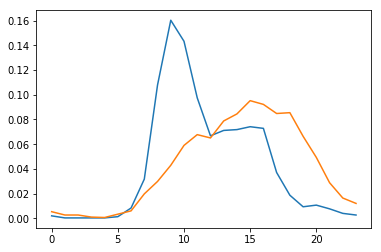

In [118]:
(cream
 .order_hour_of_day
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo
 .order_hour_of_day
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

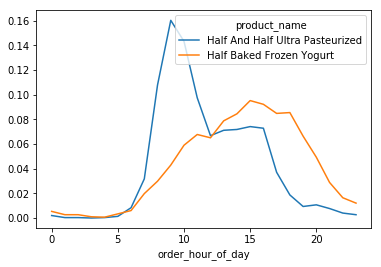

In [119]:
pd.crosstab(subset.order_hour_of_day, 
            subset.product_name,
            normalize='columns').plot();

### 3. pivot_table

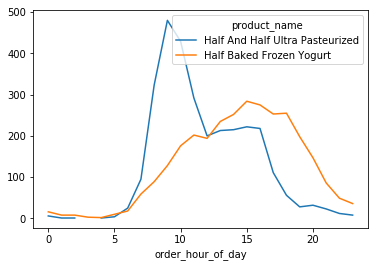

In [120]:
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset.order_hour_of_day, 
                    subset.product_name, 
                    normalize=True)

In [0]:
melted = (table
          .reset_index()
          .melt(id_vars='order_hour_of_day')
          .rename(columns={
              'order_hour_of_day': 'Hour of Day Ordered', 
              'product_name': 'Product', 
              'value': 'Percent of Orders by Product'
          }))

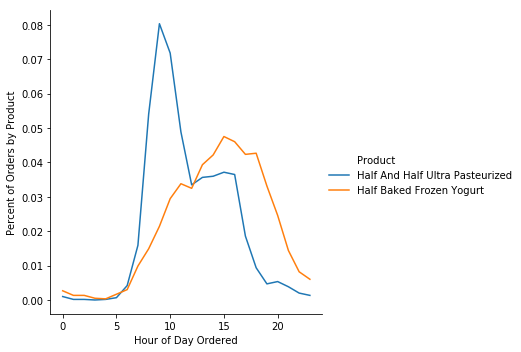

In [123]:
sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

In [124]:
melted.head()

Hour of Day Ordered                          Product  \
0                    0  Half And Half Ultra Pasteurized   
1                    1  Half And Half Ultra Pasteurized   
2                    2  Half And Half Ultra Pasteurized   
3                    3  Half And Half Ultra Pasteurized   
4                    4  Half And Half Ultra Pasteurized   

   Percent of Orders by Product  
0                      0.001004  
1                      0.000167  
2                      0.000167  
3                      0.000000  
4                      0.000167

In [0]:
#######STRETCH GOAL!
######
#####
####